In [1]:
import logging
import os
import pandas as pd

from experiments.tad_help import TadRunner

%load_ext autoreload
%autoreload 2

# Disable logging of the program in the notebook
os.environ["LOGLEVEL"] = "CRITICAL"

logging.basicConfig()
logging.root.setLevel(logging.INFO)
logging.basicConfig(level=logging.INFO)

logger = logging.getLogger('__main__')
logger.setLevel(os.environ.get("LOGLEVEL", logging.FATAL))

pybooklogger = logging.getLogger('pybook')
pybooklogger.setLevel(logging.DEBUG)

%aimport setup

from setup import *

# Track Layout
Calculate the layout of the dutch railway system


In [2]:
layout_file =   "../data/prorail/parsed/netherlands-schiphol.json"
layout = Layout(layout_file)

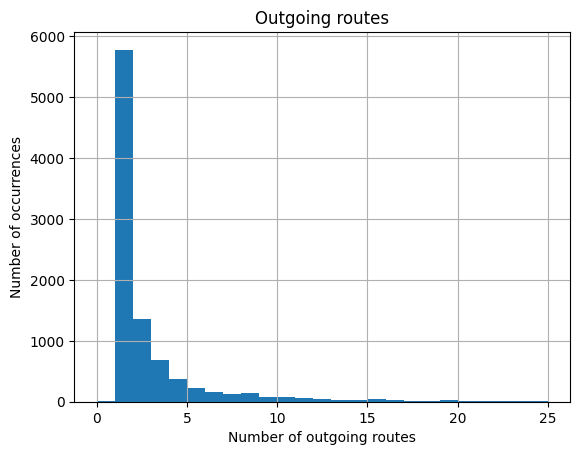

In [20]:
edges_df = pd.DataFrame({"Outgoing routes": [len(n.outgoing) for n in layout.g_block.nodes.values() if len(n.outgoing) <= 25]})
hist = edges_df.hist(bins=25, )
plt.xlabel("Number of outgoing routes")
plt.ylabel("Number of occurrences")
plt.show()

# Experiment Runtime
Take a route of an agent with many stops, and run from start to every stop as an experiment

## Scenario

In [4]:
scenario_file = "../data/prorail/scenarios/SHL/2025-07-21_3.json"
save_dir = r"C:\Users\erick\Documents\uni\Thesis\delay-replannning\experiments\results\eurostar"
tad_exp = TadRunner(layout, scenario_file, save_dir)

../data/prorail/scenarios/SHL/2025-07-21_3.json


In [5]:
experiments = tad_exp.run("1800", "o", "RTD", "SHL", default_direction=1, timeout=1200)

INFO:pybook.setup:Setting up experiment {'start_time': np.float64(780.0), 'origin': 'RTD|12', 'destination': 'SHL|1', 'filter_agents': np.int64(1), 'metadata': {'offset': 0, 'color': 'Red', 'label': 'No flexibility'}, 'velocity': 38.888888888888886, 'max_buffer_time': 0, 'use_recovery_time': False}
INFO:pybook.setup:Setting up experiment {'start_time': np.float64(780.0), 'origin': 'RTD|12', 'destination': 'SHL|1', 'max_buffer_time': 900, 'use_recovery_time': True, 'filter_agents': np.int64(1), 'metadata': {'color': 'Blue', 'label': 'Recovery time', 'offset': 0}, 'velocity': 38.888888888888886}
DEBUG:pybook.setup:Running: ../search/buildDir/atsipp.exe --start r-Rtd|272 --goal r-Shl|1066 --edgegraph output --search repeat --startTime 780.0
ERROR:pybook.setup:Timeout for repeat (1s) expired
DEBUG:pybook.setup:results of <setup.Experiment object at 0x00000222079772E0>: None
DEBUG:pybook.setup:Running: ../search/buildDir/atsipp.exe --start r-Rtd|272 --goal r-Shl|1066 --edgegraph output --se

INFO:pybook.setup:Plotting <setup.Experiment object at 0x0000025100435D30>
INFO:pybook.setup:Plotting <setup.Experiment object at 0x00000251007DEFA0>
INFO:pybook.setup:Plotting <setup.Experiment object at 0x0000025100435D30>
INFO:pybook.setup:Plotting <setup.Experiment object at 0x00000251007DEFA0>


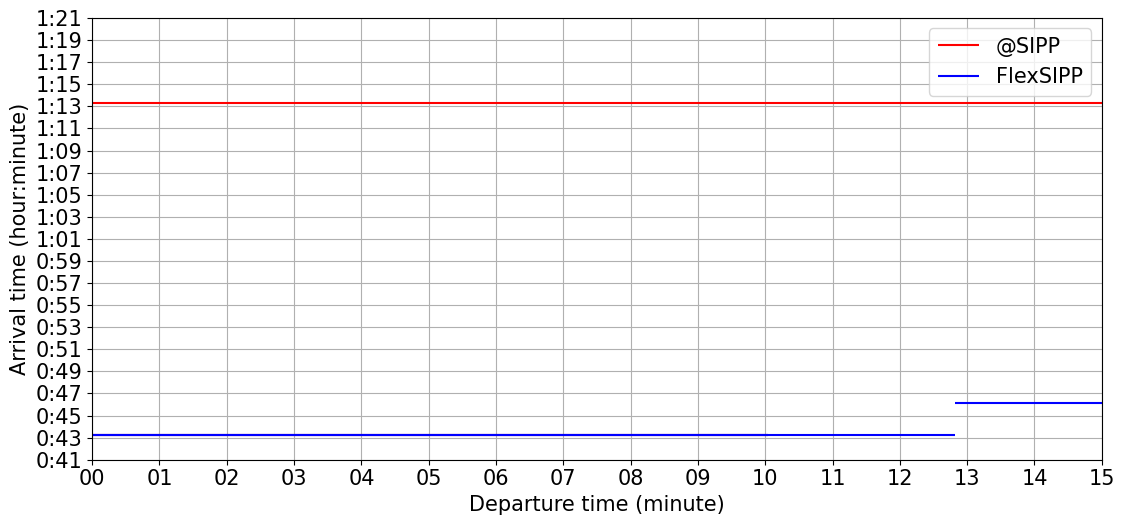

INFO:pybook.setup:Plotting <setup.Experiment object at 0x0000025100435D30>
INFO:pybook.setup:Plotting <setup.Experiment object at 0x0000025100435D30>


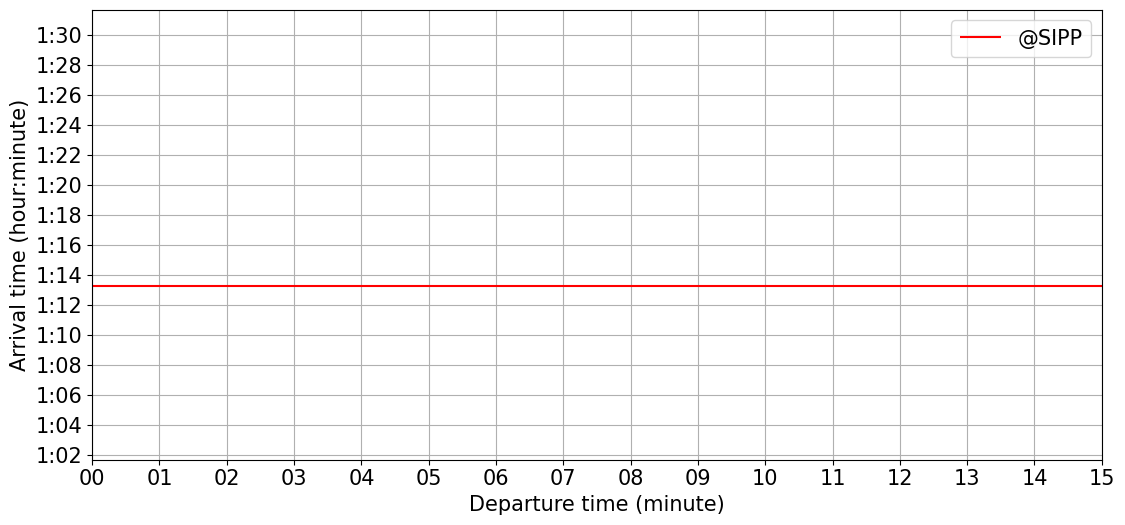

INFO:pybook.setup:Plotting <setup.Experiment object at 0x00000251007DEFA0>
INFO:pybook.setup:Plotting <setup.Experiment object at 0x00000251007DEFA0>


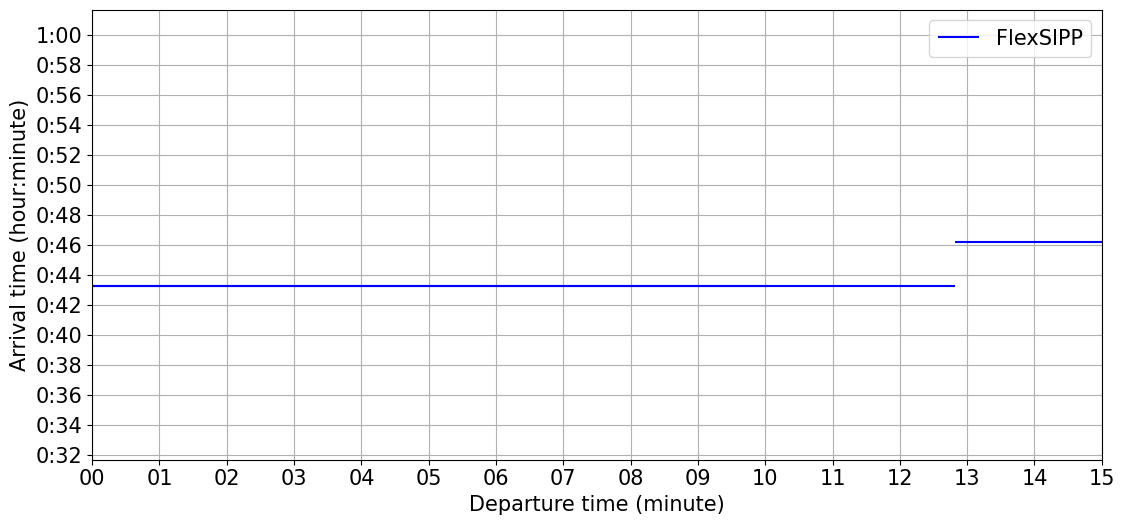

In [8]:
experiments[0].metadata = {'color': 'Red',   'label': '@SIPP',    'offset': 0, 'linestyle': 3}
experiments[1].metadata = {'color': 'Blue',  'label': 'FlexSIPP', 'offset': 0, 'linestyle': 3}

tad_exp.plot(experiments, save="eurostar", y_offset=2100, y_range=1200, include_expected_arrival=False)
tad_exp.plot([experiments[0]], save="eurostar/atsipp", y_offset=3040, include_expected_arrival=False)
tad_exp.plot([experiments[1]], save="eurostar/flexsipp", y_offset=1240, include_expected_arrival=False)

path_data = get_path_data(experiments, tad_exp.agent_df, scenario=scenario_file)
time_data = [exp.get_running_time() | exp.get_label() | {'scenario': scenario_file} for exp in experiments]
comp_data = [exp.get_complexity()   | exp.get_label() | {'scenario': scenario_file} for exp in experiments]

path_df = pd.DataFrame(path_data)
path_df.to_csv(save_dir + "/eurostar.csv")

time_df = pd.DataFrame(time_data)
time_df.to_csv(save_dir + "/eurostar-time.csv")

comp_df = pd.DataFrame(comp_data)
comp_df.to_csv(save_dir + "/eurostar-comp.csv")

In [37]:
path_df = pd.read_csv(save_dir + "/eurostar.csv", index_col=0)
path_df

,path,zeta,alpha,beta,delta,label,id,origin,destination,velocity,start_time,endTime,startTimeHuman,endTimeHuman,trainNumber,trainUnitTypes,stops,delay_location,delay_amount,scenario
0,r-Rtd|272;r-Rtd|178;r-Rmoa_Rtd|168;r-Rmoa_Rtd|...,-inf,916.95,712.65,1679.07,FlexSIPP,58,DDR|3a,GVC|2,38.888889,240.0,3360.0,0:04:00,0:56:00,5146,['SNG'],"[{'expected_arrival': 420.0, 'location': 'ZWD|...",r-Rtd|272,0.0000,../data/prorail/scenarios/SHL/2025-07-21_3.json
1,r-Rtd|272;r-Rtd|178;r-Rmoa_Rtd|168;r-Rmoa_Rtd|...,-inf,916.97,712.67,1679.04,FlexSIPP,58,DDR|3a,GVC|2,38.888889,240.0,3360.0,0:04:00,0:56:00,5146,['SNG'],"[{'expected_arrival': 420.0, 'location': 'ZWD|...",r-Rtd|272,0.0000,../data/prorail/scenarios/SHL/2025-07-21_3.json
2,r-Rtd|272;r-Rtd|178;r-Rmoa_Rtd|168;r-Rmoa_Rtd|...,-inf,916.97,728.12,1679.04,FlexSIPP,37,GVC|10,ASD|11a,38.888889,2160.0,5460.0,0:36:00,1:31:00,2144,['VIRM'],"[{'expected_arrival': 2820.0, 'location': 'LED...",r-Laa|530,0.0000,../data/prorail/scenarios/SHL/2025-07-21_3.json
3,r-Rtd|272;r-Rtd|178;r-Rmoa_Rtd|168;r-Rmoa_Rtd|...,-inf,916.97,728.12,1679.04,FlexSIPP,58,DDR|3a,GVC|2,38.888889,240.0,3360.0,0:04:00,0:56:00,5146,['SNG'],"[{'expected_arrival': 420.0, 'location': 'ZWD|...",r-Rtd|272,0.0000,../data/prorail/scenarios/SHL/2025-07-21_3.json
4,r-Rtd|272;r-Rtd|178;r-Rmoa_Rtd|168;r-Rmoa_Rtd|...,-inf,916.97,728.12,1679.04,FlexSIPP,37,GVC|10,ASD|11a,38.888889,2160.0,5460.0,0:36:00,1:31:00,2144,['VIRM'],"[{'expected_arrival': 2820.0, 'location': 'LED...",r-Gvm|192,11.5798,../data/prorail/scenarios/SHL/2025-07-21_3.json
5,r-Rtd|272;r-Rtd|178;r-Rmoa_Rtd|168;r-Rmoa_Rtd|...,-inf,916.97,728.12,1679.04,FlexSIPP,58,DDR|3a,GVC|2,38.888889,240.0,3360.0,0:04:00,0:56:00,5146,['SNG'],"[{'expected_arrival': 420.0, 'location': 'ZWD|...",r-Rtd|272,0.0000,../data/prorail/scenarios/SHL/2025-07-21_3.json
6,r-Rtd|272;r-Rtd|178;r-Rmoa_Rtd|168;r-Rmoa_Rtd|...,-inf,916.87,769.37,1679.14,FlexSIPP,37,GVC|10,ASD|11a,38.888889,2160.0,5460.0,0:36:00,1:31:00,2144,['VIRM'],"[{'expected_arrival': 2820.0, 'location': 'LED...",r-Laa|214,0.0000,../data/prorail/scenarios/SHL/2025-07-21_3.json
7,r-Rtd|272;r-Rtd|178;r-Rmoa_Rtd|168;r-Rmoa_Rtd|...,-inf,916.87,769.37,1679.14,FlexSIPP,40,BRD|2,GVC|1,38.888889,180.0,2760.0,0:03:00,0:46:00,5044,['SNG'],"[{'expected_arrival': 360.0, 'location': 'RLB|...",r-Gv|242,0.0000,../data/prorail/scenarios/SHL/2025-07-21_3.json
8,r-Rtd|272;r-Rtd|178;r-Rmoa_Rtd|168;r-Rmoa_Rtd|...,-inf,916.87,769.37,1679.14,FlexSIPP,58,DDR|3a,GVC|2,38.888889,240.0,3360.0,0:04:00,0:56:00,5146,['SNG'],"[{'expected_arrival': 420.0, 'location': 'ZWD|...",r-Rtd|272,0.0000,../data/prorail/scenarios/SHL/2025-07-21_3.json
9,r-Rtd|272;r-Rtd|178;r-Rmoa_Rtd|168;r-Rmoa_Rtd|...,-inf,1091.12,1010.98,1679.27,FlexSIPP,2,ASD|10a,HFD|2,38.888889,2100.0,3420.0,0:35:00,0:57:00,8353,['SNG'],"[{'expected_arrival': 2460.0, 'location': 'ASS...",r-Hfd|1112,0.0000,../data/prorail/scenarios/SHL/2025-07-21_3.json


In [23]:
import re

allowed_delay = 180

def td_str(td):
    return ':'.join(re.split(r'[:.]+', str(td)) [1:3])

def extract_tipping_point(df):
    def apply_func(df):

        result=df.groupby("Delay Location").agg({
            "alpha": "min",
            "beta": "max",
            "Delay Amount": "max",
        })
        result = result.loc[result['alpha'] < 900]
        result["Tipping Point"] = result["alpha"].apply(lambda x: td_str(timedelta(seconds=x)))

        def tp_finder(x):
            new_tp = x['beta'] - max(0, x['Delay Amount'] - allowed_delay)
            if new_tp > 0:
                return td_str(timedelta(seconds=new_tp))
            return "-"

        # result[f"Tipping Point ({allowed_delay}s)"] = result.apply(tp_finder, axis=1)
        return result.sort_values("Tipping Point", ascending=True).drop(columns=["alpha", "beta", "Delay Amount"])

    df["Delay Location"] = df["Delay Location"].str.split("|").apply(lambda x: x[0])
    df = df.groupby(by='Train').apply(apply_func, include_groups=False)
    return df

tp_df = path_df.rename(columns={
    "delay_amount": "Delay Amount",
    "delay_location": "Delay Location",
    "trainNumber": "Train",
    "scenario": "Scenario",
    "label": "Label",
})

tp_df["Scenario"] = tp_df["Scenario"].apply(lambda x: x.split(".")[0])
tp_df["Delay Location"] = tp_df["Delay Location"].apply(lambda x: x.split("-")[1])
tp_df = tp_df.groupby(["Scenario"]).apply(extract_tipping_point, include_groups=False)
# tp_df = tp_df.loc[tp_df.index.get_level_values('Train').astype(str).str.startswith("43")]
# tp_df = tp_df.loc[tp_df.index.get_level_values('Delay Location').astype(str).str.startswith("Ledn")]
tp_df.to_latex(save_dir + "/eurostar.tex", escape=True)
tp_df

,,,Tipping Point
Scenario,Train,Delay Location,


### Blocking staircase diagram
Showing the route of the agent with the most stops, its quite long.


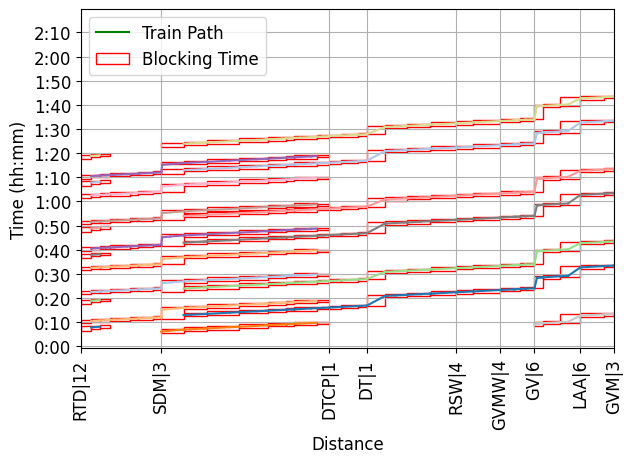

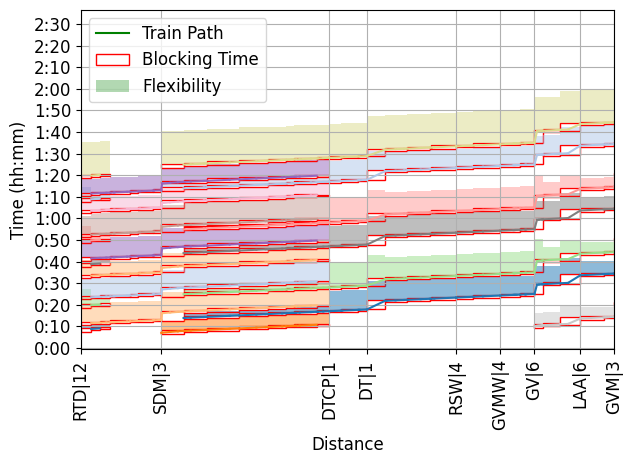

In [14]:
experiments[0].metadata = experiments[0].metadata | {'label': ''}
experiments[1].metadata = experiments[0].metadata | {'label': '_buffer'}
for exp in experiments:
    exp.s.plot(exp.agent.id, exp.block_intervals, exp.buffer_times, exp.recovery_times, False, start="RTD", end="GV", savefig=f"{save_dir}/blocking_staircase{exp.metadata['label'].replace(' ', '_')}.png")

In [7]:
for exp in experiments:
    exp.agent.start_time = 1503

In [11]:
timeout = 600
run_experiments([experiments[1]], timeout)

DEBUG:pybook.setup:Running: ../search/buildDir/atsipp.exe --start r-Shl|1078 --goal r-Rtd|344 --edgegraph output --search repeat --startTime 1503
DEBUG:pybook.setup:repeat output: ['<0,inf,inf,inf> <-inf,1600.72,4058.34,4058.34>', '<1600.72,inf,inf,inf> <1600.72,1648.4,4058.34,4106.02>', '<1648.4,inf,inf,inf> <-inf,1648.4,4106.02,4106.02>', '<1600.72,1648.4,4058.34,4106.02> <-inf,1648.4,4106.02,4106.02>', '<1648.4,inf,inf,inf> <1648.4,1693.5,4106.02,4151.12>', '<1648.4,1648.4,4106.02,4106.02> <1648.4,1693.5,4106.02,4151.12>', '<1600.72,1648.4,4058.34,4106.02> <1648.4,1648.4,4106.02,4106.02>', '<1693.5,inf,inf,inf> <-inf,1693.5,4151.15,4151.15>', '<1648.4,1693.5,4106.02,4151.12> <-inf,1693.5,4151.15,4151.15>', '<1648.4,1648.4,4106.02,4106.02> <-inf,1648.4,4151.15,4151.15>', '<1600.72,1648.4,4058.34,4106.02> <-inf,1648.4,4151.15,4151.15>', '<1693.5,inf,inf,inf> <1693.5,1702.24,4151.15,4159.88>', '<1693.5,1693.5,4151.15,4151.15> <1693.5,1702.24,4151.15,4159.88>', '<1648.4,1693.5,4106.02,4

## Results

### ATF Plot

C:\Users\erick\Documents\uni\Thesis\delay-replannning\experiments\setup.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels([str(timedelta(seconds=xtick)) for xtick in axs[0].get_xticks()])
C:\Users\erick\Documents\uni\Thesis\delay-replannning\experiments\setup.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels([str(timedelta(seconds=ytick)) for ytick in axs[0].get_yticks()])
C:\Users\erick\Documents\uni\Thesis\delay-replannning\experiments\setup.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels([str(timedelta(seconds=xtick)) for xtick in axs[1].get_xticks()])
INFO:pybook.setup:Plotting <setup.Experiment object at 0x00000251163692B0>
INFO:pybook.setup:Plotting <setup.Experiment object at 0x0000025124A2D760>
INFO:pybook.setup:Plotting <setup.Experiment object at 0x0000025116670580>


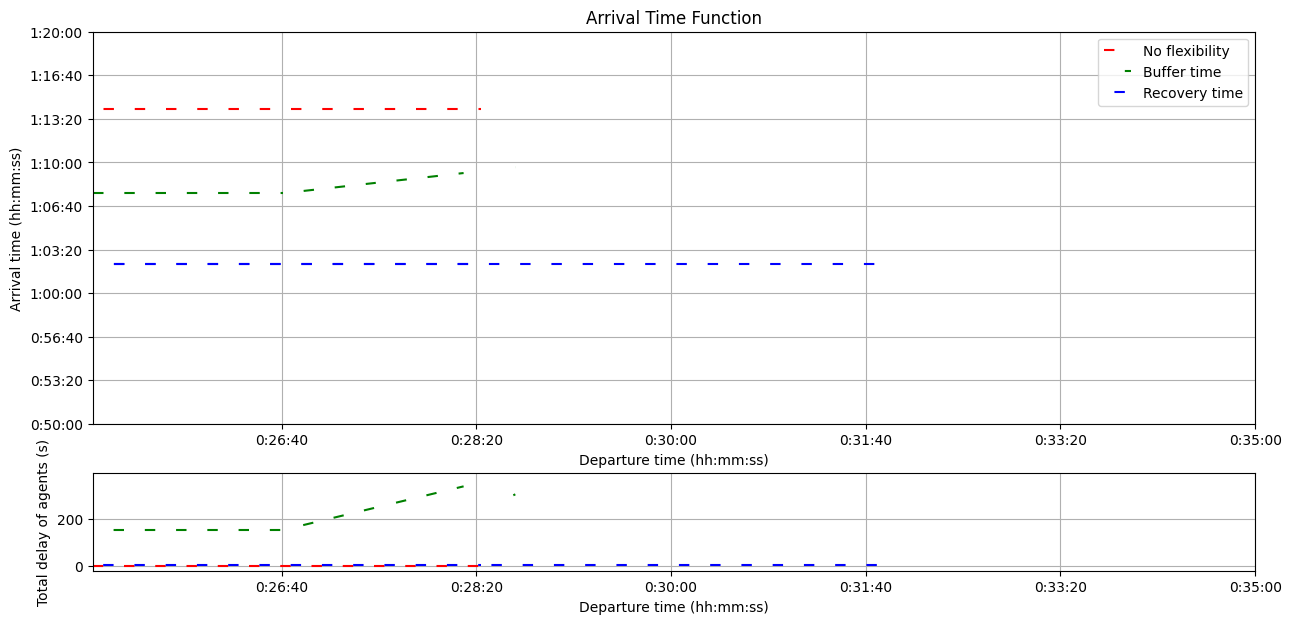

INFO:pybook.setup:Plotting <setup.Experiment object at 0x00000251163692B0>


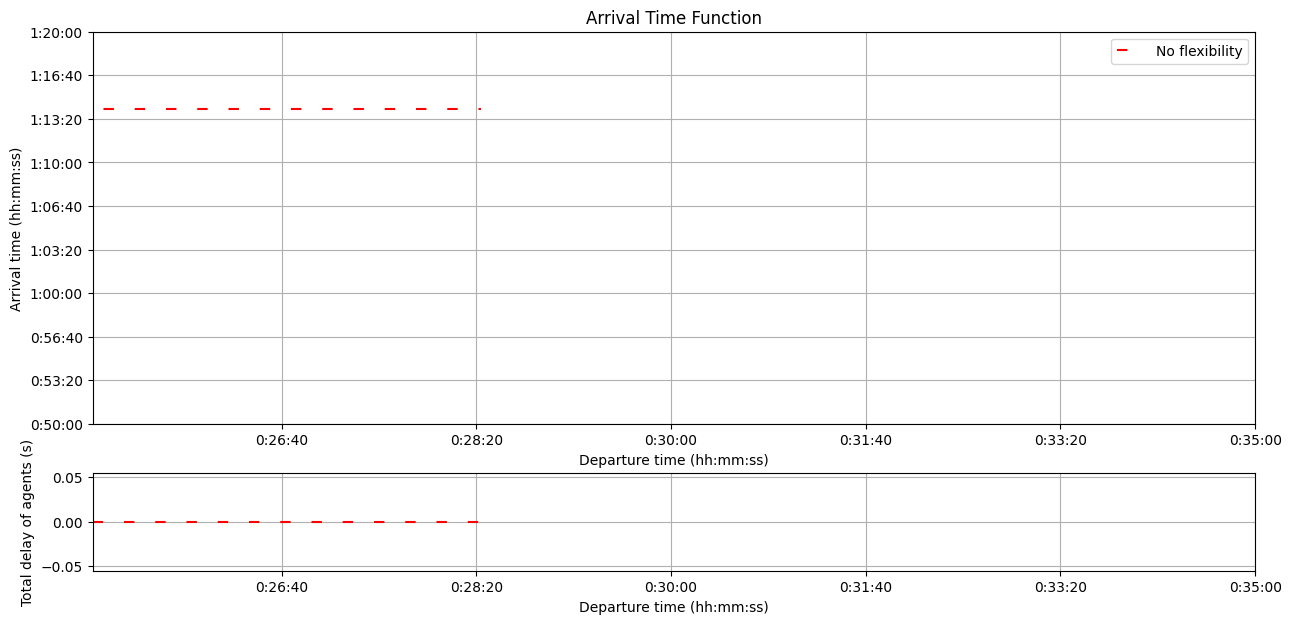

INFO:pybook.setup:Plotting <setup.Experiment object at 0x0000025124A2D760>


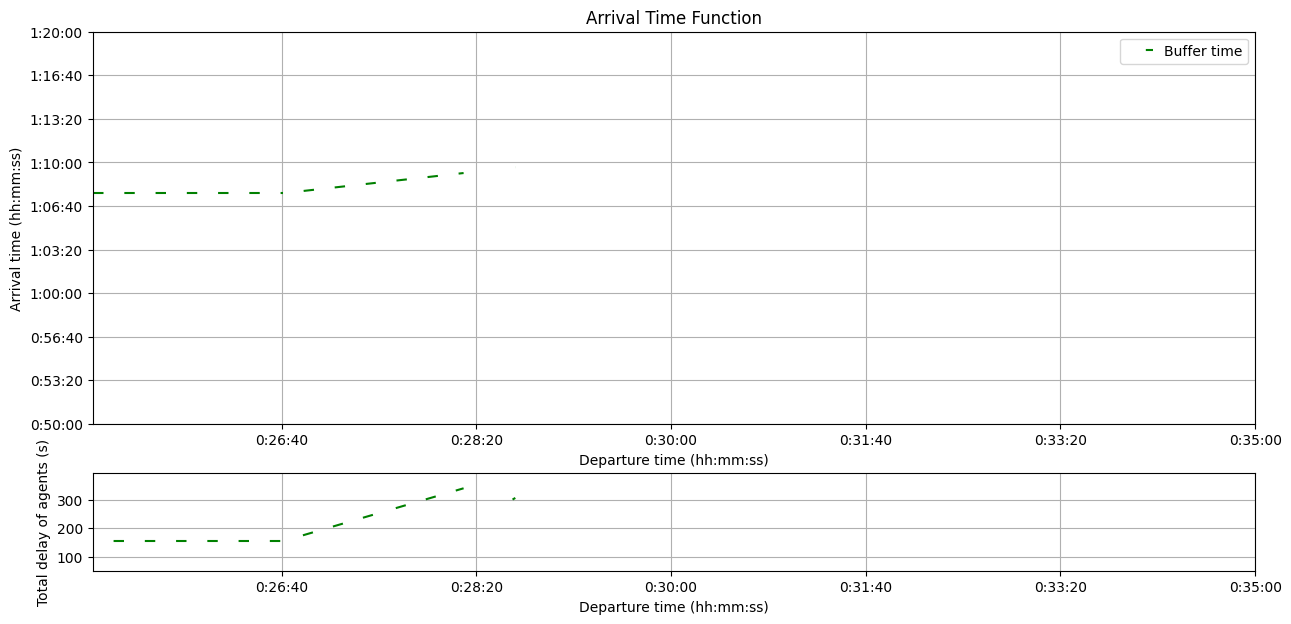

INFO:pybook.setup:Plotting <setup.Experiment object at 0x0000025116670580>


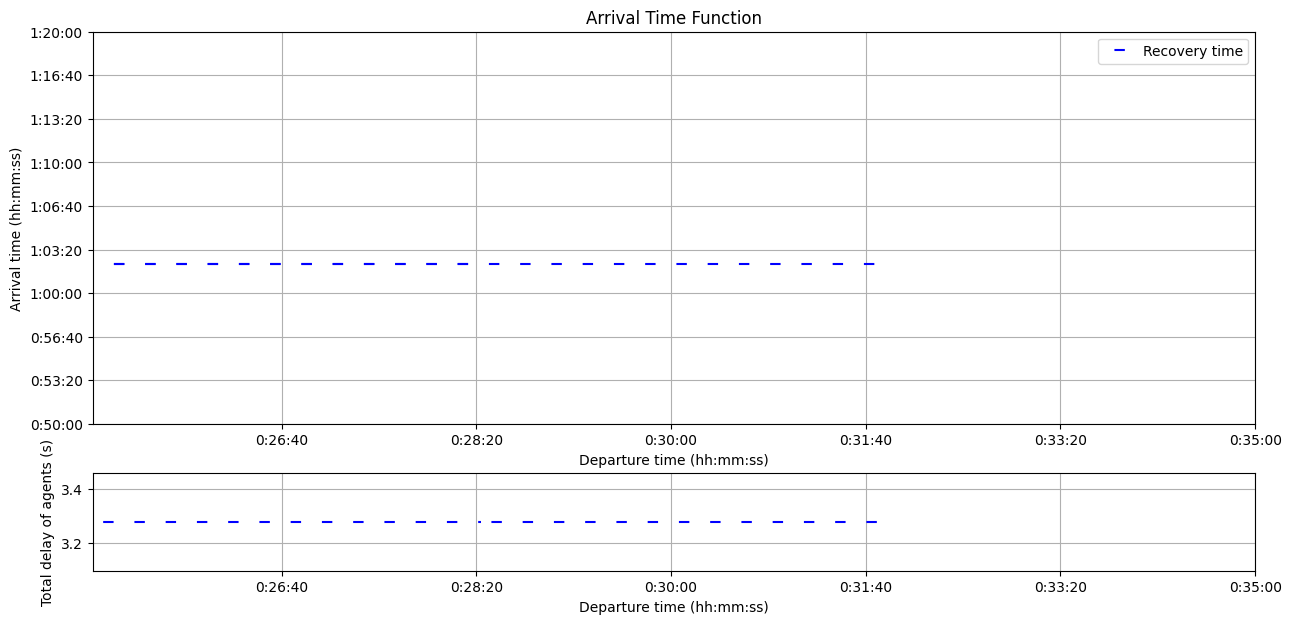

In [15]:
experiments[0].metadata = {'color': 'Red', 'label': 'No flexibility', 'offset': 0,  'linestyle': 3}
experiments[1].metadata = {'color': 'Green', 'label': 'Buffer time', 'offset': 0,   'linestyle': 3}
experiments[2].metadata = {'color': 'Blue', 'label': 'Recovery time', 'offset': -0, 'linestyle': 3}

kwargs = {"min_x": 1503, "max_x": 2100, "min_y": 50 * 60, "max_y": 80 * 60}
plot_experiments(experiments, **kwargs)


experiments[0].metadata = {'color': 'Red', 'label': 'No flexibility', 'offset': 0, 'linestyle': 3}
experiments[1].metadata = {'color': 'Green', 'label': 'Buffer time', 'offset': 0,  'linestyle': 3}
experiments[2].metadata = {'color': 'Blue', 'label': 'Recovery time', 'offset': 0, 'linestyle': 3}

plot_experiments([experiments[0]], **kwargs)
plot_experiments([experiments[1]], **kwargs)
plot_experiments([experiments[2]], **kwargs)

### Time statistics

In [33]:
def sum_cols(df1, cols, name):
    df2 = df1.drop(columns=cols)
    df2[name] = df1[cols].sum(axis=1)
    return df2

time_df = pd.DataFrame([exp.get_running_time() for exp in experiments], index=[exp.metadata['label'] for exp in experiments])

setup_cols = ["track graph creation", "routing graph creation"]
recompute_cols = ["unsafe interval generation", "safe interval generation", "bt and crt generation", "converting routes to blocks"]
search_cols = ["FlexSIPP search time"]

time_df = sum_cols(time_df, setup_cols, "Setup Time")
time_df = sum_cols(time_df, recompute_cols, "Recompute Time")
time_df = sum_cols(time_df, search_cols, "Search Time")
time_df

,Setup Time,Recompute Time,Search Time
No flexibility,64.591588,246.623732,35.259
Buffer time,64.591588,246.526145,253.956
Recovery time,64.591588,246.558642,249.597


### Search Node Statistics


In [21]:
nodes_df = pd.DataFrame([exp.get_complexity() for exp in experiments], index=[exp.metadata['label'] for exp in experiments])

nodes_df

,nodes generated,nodes decreased,nodes expanded
No flexibility,1512,283,1026
Buffer time,-1,-1,-1
Recovery time,8982,7652,5563


### Output paths found


In [22]:
for key, value in experiments[2].results[3].items():
    delayed_trains = {i: v for i,v in enumerate(value[0][4]) if float(v[0]) > 0}
    print(f"{key.replace('r-', '')}\nearliest departure: {int(min(float(value[0][1]), float(value[0][2])) / 60)}\ndepart before: {int(float(value[0][2]) / 60)}\narrive at: {int((float(value[0][1]) + float(value[0][3])) / 60)}\ndelays trains: {delayed_trains}")

Shl|1080;Shl|1098;Hfd_Shl|1757;Hfd_Shl|1771;Hfd|1106;Hfd|1132;Hfd|1148;Hfd|1202;Hfd|1228;Hfd_Ledn|1969;Hfd_Ledn|1971;Hfd_Ledn|1973;Hfd_Ledn|1975;Hfd_Ledn|1977;Hfd_Ledn|1979;Hfd_Ledn|1981;Hfd_Ledn|1983;Hfd_Ledn|1985;Hfd_Ledn|1987;Hfd_Ledn|1991;Ledn|1010;Ledn|1048;Ledn|1092;Gvm_Ledn|805;Gvm_Ledn|815;Gvm_Ledn|825;Gvm_Ledn|835;Gvm_Ledn|845;Gvm_Ledn|855;Gvm|156;Gvm|184;Laa|1815;Laa|212;Gv|224;Gv|300;Gv|328;Dt_Gv|605;Dt_Gv|613;Dt_Gv|621;Dt_Gv|629;Dt|643;Dt|6136;Dt|6166;Dt|6186;Dt|6206;Dtcp|6246;Dtcp|6266;Dt_Sdm|803;Dt_Sdm|809;Dt_Sdm|815;Dt_Sdm|819;Dt_Sdm|825;Dt_Sdm|831;Dt_Sdm|835;Sdm|38;Sdm|48;Sdm|68;Sdm|98;Rmoa_Rtd|120;Rmoa_Rtd|160;Rtd|172;Rtd|236;Rtd|344
earliest departure: 28
depart before: 28
arrive at: 62
delays trains: {35: ['201.255', '201.255', '197.977']}
Shl|1080;Shl|1098;Hfd_Shl|1757;Hfd_Shl|1771;Hfd|1106;Hfd|1130;Hfd|1148;Hfd|1202;Hfd|1228;Hfd_Ledn|1969;Hfd_Ledn|1971;Hfd_Ledn|1973;Hfd_Ledn|1975;Hfd_Ledn|1977;Hfd_Ledn|1979;Hfd_Ledn|1981;Hfd_Ledn|1983;Hfd_Ledn|1985;Hfd_Ledn|1987;Hf

### Path statistics


In [23]:
for exp in experiments:
    print(f"Differend paths found for {exp.metadata['label']}: {sum(exp.results[2].values())}")

Differend paths found for No flexibility: 5


TypeError: 'NoneType' object is not subscriptable